# Understanding the data


## Context

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Content

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

source: https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

The data is divided into files, `world-happiness-report.csv` which has information from the past years, and `world-happiness-report-2021.csv`, which has the current year information.

In [2]:
hpast = pd.read_csv("data/world-happiness-report.csv")
hpast

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


Checking if there is missing data:

In [3]:
hpast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


Only `Country name`, `year`, and `Life Ladder` don't have missing values. If in the future we need to fill these missing data, we can use a metric like the mean or the median. 

The mean can be used if the data has no skewness, like the Normal distribution. Otherwise, it is more advisable use the median.

Thus, let's evaluate the fields distribution using histograms.

*NOTE: Probably I'll use this data as time series. In that case, a method like interpolation is more efficient than imputation.*

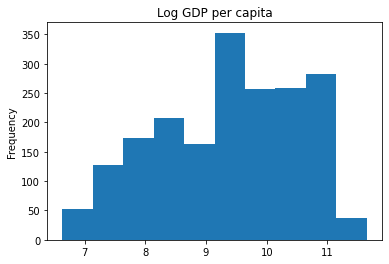

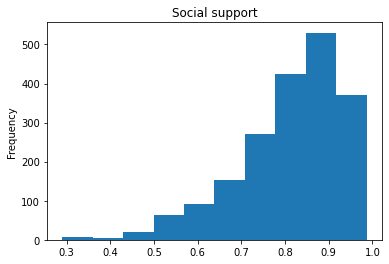

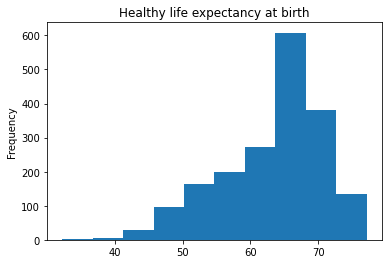

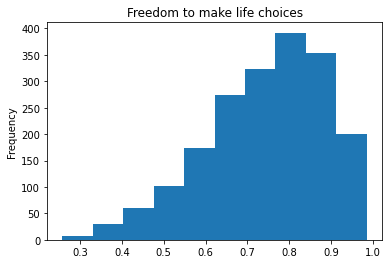

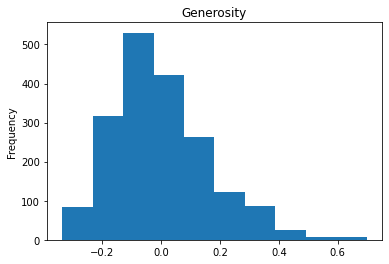

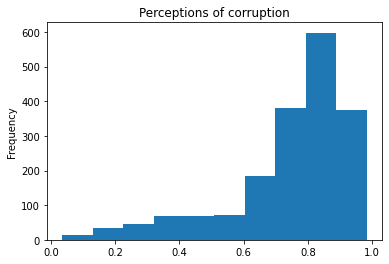

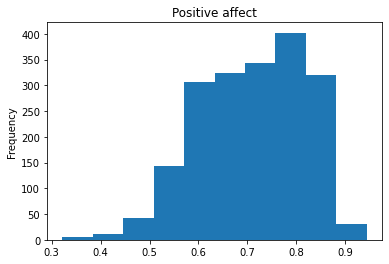

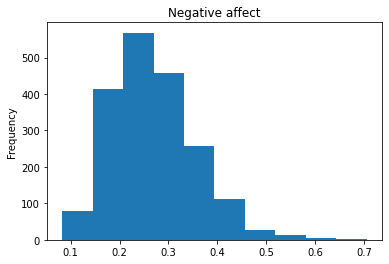

In [4]:
lenh = len(hpast)
for column in hpast.columns:
    if hpast[column].count() < lenh:
        hpast[column].plot(kind="hist", title=column);
        plt.show()

The histograms above show the following:

- **Log GDP per capita**: apparently bimodal, some trouble to deal with missing 
- **Social support**: negative skewness
- **Healthy life expectancy at birth**: negative skewness
- **Freedom to make life choices**: negative skewness
- **Generosity**: positive skewness
- **Perceptions of corruption**: negative skewness
- **Positive affect**: approximately simmetrical
- **Negative affect**: approximately simmetrical

In [5]:
hpast = hpast.loc[hpast["year"] >= 2015]

In [6]:
hpivot = hpast.pivot(index="Country name", columns="year")
hpivot

Life Ladder                                     \
year                2015   2016   2017   2018   2019   2020   
Country name                                                  
Afghanistan        3.983  4.220  2.662  2.694  2.375    NaN   
Albania            4.607  4.511  4.640  5.004  4.995  5.365   
Algeria              NaN  5.341  5.249  5.043  4.745    NaN   
Argentina          6.697  6.427  6.039  5.793  6.086  5.901   
Armenia            4.348  4.325  4.288  5.062  5.488    NaN   
...                  ...    ...    ...    ...    ...    ...   
Venezuela          5.569  4.041  5.071  5.006  5.081  4.574   
Vietnam            5.076  5.062  5.175  5.296  5.467    NaN   
Yemen              2.983  3.826  3.254  3.058  4.197    NaN   
Zambia             4.843  4.348  3.933  4.041  3.307  4.838   
Zimbabwe           3.703  3.735  3.638  3.616  2.694  3.160   

             Log GDP per capita                          ... Positive affect  \
year                       2015    2016    2017    2018  ...            2017   
Country name                                             ...                   
Afghanistan               7.702   7.697   7.697   7.692  ...           0.496   
Albania                   9.403   9.437   9.476   9.518  ...           0.669   
Algeria                     NaN   9.362   9.354   9.348  ...           0.642   
Argentina                10.083  10.051  10.067  10.032  ...           0.809   
Armenia                   9.334   9.333   9.402   9.451  ...           0.625   
...                         ...     ...     ...     ...  ...             ...   
Venezuela                 9.001   9.010   9.073     NaN  ...           0.726   
Vietnam                   8.770   8.820   8.876   8.934  ...             NaN   
Yemen                     7.858   7.715   7.578     NaN  ...           0.455   
Zambia                    8.144   8.151   8.156   8.167  ...           0.685   
Zimbabwe                  7.992   7.984   8.016   8.049  ...           0.806   

                                  Negative affect                              \
year           2018   2019   2020            2015   2016   2017   2018   2019   
Country name                                                                    
Afghanistan   0.424  0.351    NaN           0.339  0.348  0.371  0.405  0.502   
Albania       0.713  0.681  0.679           0.350  0.322  0.334  0.319  0.274   
Algeria       0.591  0.585    NaN             NaN  0.377  0.289  0.293  0.215   
Argentina     0.820  0.826  0.764           0.305  0.312  0.292  0.321  0.319   
Armenia       0.581  0.598    NaN           0.438  0.437  0.437  0.455  0.430   
...             ...    ...    ...             ...    ...    ...    ...    ...   
Venezuela     0.759  0.761  0.722           0.223  0.392  0.363  0.374  0.351   
Vietnam       0.692  0.751    NaN           0.232  0.223    NaN  0.191  0.186   
Yemen         0.461  0.543    NaN           0.321  0.228  0.295  0.315  0.213   
Zambia        0.703  0.743  0.691           0.382  0.372  0.387  0.351  0.394   
Zimbabwe      0.710  0.716  0.703           0.179  0.209  0.224  0.212  0.235   

                     
year           2020  
Country name         
Afghanistan     NaN  
Albania       0.265  
Algeria         NaN  
Argentina     0.342  
Armenia         NaN  
...             ...  
Venezuela     0.396  
Vietnam         NaN  
Yemen           NaN  
Zambia        0.345  
Zimbabwe      0.346  

[157 rows x 54 columns]

We note here that the field `Perceptions of corruption` is empty in all years for UAE. Thus, there is not possible evaluate this field using Time Series.

In [7]:
hpivot.loc[hpivot.index == "United Arab Emirates"].transpose()

Country name                           United Arab Emirates
                                 year                      
Life Ladder                      2015                 6.568
                                 2016                 6.831
                                 2017                 7.039
                                 2018                 6.604
                                 2019                 6.711
                                 2020                 6.458
Log GDP per capita               2015                11.086
                                 2016                11.105
                                 2017                11.115
                                 2018                11.112
                                 2019                11.114
                                 2020                11.053
Social support                   2015                 0.824
                                 2016                 0.849
                                 2017                 0.836
                                 2018                 0.851
                                 2019                 0.862
                                 2020                 0.827
Healthy life expectancy at birth 2015                66.500
                                 2016                66.700
                                 2017                66.900
                                 2018                67.100
                                 2019                67.300
                                 2020                67.500
Freedom to make life choices     2015                 0.915
                                 2016                 0.949
                                 2017                 0.962
                                 2018                 0.944
                                 2019                 0.911
                                 2020                 0.942
Generosity                       2015                 0.201
                                 2016                 0.131
                                 2017                 0.216
                                 2018                 0.054
                                 2019                 0.129
                                 2020                 0.060
Perceptions of corruption        2015                   NaN
                                 2016                   NaN
                                 2017                   NaN
                                 2018                   NaN
                                 2019                   NaN
                                 2020                   NaN
Positive affect                  2015                 0.761
                                 2016                 0.775
                                 2017                 0.795
                                 2018                 0.787
                                 2019                 0.793
                                 2020                 0.752
Negative affect                  2015                 0.296
                                 2016                 0.245
                                 2017                 0.208
                                 2018                 0.302
                                 2019                 0.284
                                 2020                 0.298

In [8]:
h21 = pd.read_csv("data/world-happiness-report-2021.csv")
h21

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


Checking the missing data. For 2021, there is no missing values.

In [9]:
h21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [10]:
h21.loc[h21["Country name"] == "United Arab Emirates"].transpose()

,24
Country name,United Arab Emirates
Regional indicator,Middle East and North Africa
Ladder score,6.561
Standard error of ladder score,0.039
upperwhisker,6.637
lowerwhisker,6.484
Logged GDP per capita,11.085
Social support,0.844
Healthy life expectancy,67.333
Freedom to make life choices,0.932
